In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
data = pd.read_csv('Mobile-Price-Prediction-cleaned_data.csv')
data.shape

(807, 8)

In [ ]:
data.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        807 non-null    float64
 1   RAM            807 non-null    float64
 2   ROM            807 non-null    float64
 3   Mobile_Size    807 non-null    float64
 4   Primary_Cam    807 non-null    int64  
 5   Selfi_Cam      807 non-null    float64
 6   Battery_Power  807 non-null    int64  
 7   Price          807 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 50.6 KB


In [ ]:
data.columns.tolist()

['Ratings',
 'RAM',
 'ROM',
 'Mobile_Size',
 'Primary_Cam',
 'Selfi_Cam',
 'Battery_Power',
 'Price']

In [ ]:
rows, cols = data.shape
print(f"Rows: {rows}")
print(f"Columns: {cols}")

Rows: 807
Columns: 8


In [ ]:
data.describe()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,4.112639,5.941760,64.390335,5.620660,47.821561,8.868649,3278.859975,14269.167286
std,0.367830,2.056359,53.868626,3.957409,11.155916,4.547254,937.628801,23092.739983
min,2.800000,0.000000,2.000000,2.000000,5.000000,0.000000,1020.000000,479.000000
25%,3.900000,6.000000,32.000000,4.500000,48.000000,8.000000,3000.000000,984.000000
50%,4.100000,6.000000,32.000000,4.770000,48.000000,8.000000,3000.000000,1699.000000
75%,4.400000,6.000000,64.000000,6.300000,48.000000,12.000000,3800.000000,18994.500000
max,4.800000,12.000000,256.000000,44.000000,64.000000,23.000000,6000.000000,153000.000000


In [ ]:
null_values = data.isnull().sum()
print(null_values)
print("\nTotal:", null_values.sum())

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

Total: 0


In [ ]:
data.dtypes

Ratings          float64
RAM              float64
ROM              float64
Mobile_Size      float64
Primary_Cam        int64
Selfi_Cam        float64
Battery_Power      int64
Price              int64
dtype: object

In [ ]:
# Robustly handle missing/renamed columns (use alternatives or show available columns)
col_candidates = ['make', 'brand', 'manufacturer', 'maker']
col_map = {c.lower().strip(): c for c in data.columns}
found = None
for cand in col_candidates:
    if cand in col_map:
        found = col_map[cand]
        break
if found is None:
    print("Column 'make' not found. Available columns:")
    print(data.columns.tolist())
else:
    print(data[found].unique())
    print("\nUnique makes:", data[found].nunique())
    print("\n" + "="*50)
    print("\nFuel types:")
    if 'fuel_type' in col_map:
        print(data[col_map['fuel_type']].unique())
    elif 'fuel' in col_map:
        print(data[col_map['fuel']].unique())
    else:
        print("No 'fuel_type' column found.")
    print("\n" + "="*50)
    print("\nTransmission types:")
    if 'transmission' in col_map:
        print(data[col_map['transmission']].unique())
    else:
        print("No 'transmission' column found.")

Column 'make' not found. Available columns:
['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam', 'Battery_Power', 'Price']


In [ ]:
data.sample(10)

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
195,4.1,6.0,32.0,4.50,48,15.0,3000,1099
737,4.1,8.0,64.0,4.54,64,8.0,2500,1199
51,3.8,6.0,32.0,4.54,48,8.0,2800,1299
515,4.5,6.0,32.0,4.50,64,15.0,3000,649
392,3.9,6.0,32.0,4.50,64,12.0,2000,749
151,3.8,6.0,32.0,44.00,48,8.0,3000,890
343,3.6,6.0,64.0,4.50,48,8.0,3500,629
764,4.5,6.0,128.0,6.39,48,13.0,4030,24999
528,3.5,6.0,32.0,4.50,64,8.0,1050,799
387,4.1,1.0,16.0,5.00,5,2.0,2500,5049


In [ ]:
data.tail()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
802,3.8,6.0,32.0,4.54,48,12.0,2800,1299
803,4.1,8.0,64.0,4.54,64,8.0,2500,1390
804,4.4,3.0,32.0,6.20,48,1.0,3800,9790
805,3.7,10.0,32.0,4.50,64,8.0,3500,799
806,3.5,6.0,32.0,4.50,64,15.0,1050,799


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        807 non-null    float64
 1   RAM            807 non-null    float64
 2   ROM            807 non-null    float64
 3   Mobile_Size    807 non-null    float64
 4   Primary_Cam    807 non-null    int64  
 5   Selfi_Cam      807 non-null    float64
 6   Battery_Power  807 non-null    int64  
 7   Price          807 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 50.6 KB


In [ ]:
data.columns.tolist()

['Ratings',
 'RAM',
 'ROM',
 'Mobile_Size',
 'Primary_Cam',
 'Selfi_Cam',
 'Battery_Power',
 'Price']

In [ ]:
rows, cols = data.shape
print(f"Rows: {rows}")
print(f"Columns: {cols}")

Rows: 807
Columns: 8


In [ ]:
data.describe()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,4.112639,5.941760,64.390335,5.620660,47.821561,8.868649,3278.859975,14269.167286
std,0.367830,2.056359,53.868626,3.957409,11.155916,4.547254,937.628801,23092.739983
min,2.800000,0.000000,2.000000,2.000000,5.000000,0.000000,1020.000000,479.000000
25%,3.900000,6.000000,32.000000,4.500000,48.000000,8.000000,3000.000000,984.000000
50%,4.100000,6.000000,32.000000,4.770000,48.000000,8.000000,3000.000000,1699.000000
75%,4.400000,6.000000,64.000000,6.300000,48.000000,12.000000,3800.000000,18994.500000
max,4.800000,12.000000,256.000000,44.000000,64.000000,23.000000,6000.000000,153000.000000


In [ ]:
null_values = data.isnull().sum()
print(null_values)
print("\nTotal:", null_values.sum())

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

Total: 0


In [ ]:
data.dtypes

Ratings          float64
RAM              float64
ROM              float64
Mobile_Size      float64
Primary_Cam        int64
Selfi_Cam        float64
Battery_Power      int64
Price              int64
dtype: object

In [ ]:
data.sample(10)

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
621,4.2,6.0,32.0,4.54,48,15.0,2500,1259
114,3.7,4.0,40.0,4.58,48,8.0,3800,1799
788,4.5,6.0,128.0,6.39,48,13.0,3800,24999
400,3.8,6.0,32.0,4.77,48,15.0,3000,959
660,4.4,4.0,128.0,6.53,48,2.0,3500,16490
627,4.1,6.0,32.0,4.54,48,20.0,3500,3399
79,3.9,6.0,64.0,4.54,48,8.0,3600,1799
17,4.5,8.0,128.0,6.70,64,1.0,4700,77999
685,4.4,8.0,128.0,6.70,48,8.0,3000,40900
521,3.4,4.0,64.0,5.50,48,5.0,3000,13999


In [ ]:
print("Checking for missing values...")
missing_data = data.isnull().sum()
print("Missing values per column:")
print(missing_data)
print("\nTotal missing values:", missing_data.sum())

Checking for missing values...
Missing values per column:
Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

Total missing values: 0


In [ ]:
print(f"Shape before: {data.shape}")
data = data.dropna()
print(f"Shape after: {data.shape}")

Shape before: (807, 8)
Shape after: (807, 8)


In [ ]:
float_cols = data.select_dtypes(include=['float64']).columns
print("Columns with float datatype:")
print(float_cols.tolist())

Columns with float datatype:
['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Selfi_Cam']


In [ ]:
for col in float_cols:
    data[col] = data[col].astype(int)

print("Conversion completed")
print(data.dtypes)

Conversion completed
Ratings          int64
RAM              int64
ROM              int64
Mobile_Size      int64
Primary_Cam      int64
Selfi_Cam        int64
Battery_Power    int64
Price            int64
dtype: object


In [ ]:
print("Final data shape:", data.shape)
print("\nData types after preprocessing:")
print(data.dtypes)
print("\nNull values after preprocessing:")
print(data.isnull().sum().sum())

Final data shape: (807, 8)

Data types after preprocessing:
Ratings          int64
RAM              int64
ROM              int64
Mobile_Size      int64
Primary_Cam      int64
Selfi_Cam        int64
Battery_Power    int64
Price            int64
dtype: object

Null values after preprocessing:
0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
# Required imports (ensure available when this cell runs)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Mobile Price Prediction — regression pipeline (predict numeric Price)
# Selected features based on dataset
features = ['Ratings','RAM','ROM','Mobile_Size','Primary_Cam','Selfi_Cam','Battery_Power']

# Prepare X and y
X = data[features]
y = data['Price']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model: Random Forest Regressor (good baseline)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test_scaled)

# compute RMSE without using 'squared' kwarg (more compatible)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R2:   {r2:.4f}")

# Show some predictions vs actual
print('\nSample predictions:')
for actual, pred in list(zip(y_test.values[:10], y_pred[:10])):
    print(f"Actual: {actual}  Pred: {pred:.2f}")

# Save model and scaler for later use
joblib.dump(model, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print('\nModel and scaler saved to rf_model.pkl and scaler.pkl')

Features shape: (807, 7)
Target shape: (807,)
RMSE: 7810.94
MAE:  3032.86
R2:   0.8555

Sample predictions:
Actual: 1280  Pred: 1824.31
Actual: 985  Pred: 932.51
Actual: 639  Pred: 790.90
Actual: 18499  Pred: 18489.78
Actual: 3149  Pred: 1676.31
Actual: 18999  Pred: 19588.46
Actual: 9998  Pred: 12346.55
Actual: 11999  Pred: 14476.84
Actual: 13999  Pred: 14893.75
Actual: 3999  Pred: 1222.24

Model and scaler saved to rf_model.pkl and scaler.pkl


In [ ]:
y_pred = model.predict(X_test)

print("Predictions made")
print("First 10 predictions:")
print(y_pred[:10])

Predictions made
First 10 predictions:
[33451.77888889 33451.77888889 33451.77888889 33451.77888889
 33451.77888889 33451.77888889 33451.77888889 33451.77888889
 33451.77888889 33451.77888889]


C:\Users\mashi\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Model Performance:")
print("="*40)
print(f"R2 Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Accuracy: {r2*100:.2f}%")

Model Performance:
R2 Score: -0.8395
Mean Squared Error: 776851468.6932
Mean Absolute Error: 25089.8825
Accuracy: -83.95%


In [ ]:
comparison = pd.DataFrame({'Actual': y_test[:10].values, 'Predicted': y_pred[:10]})
print("Actual vs Predicted (first 10 samples):")
print(comparison)

Actual vs Predicted (first 10 samples):
   Actual     Predicted
0    1280  33451.778889
1     985  33451.778889
2     639  33451.778889
3   18499  33451.778889
4    3149  33451.778889
5   18999  33451.778889
6    9998  33451.778889
7   11999  33451.778889
8   13999  33451.778889
9    3999  33451.778889


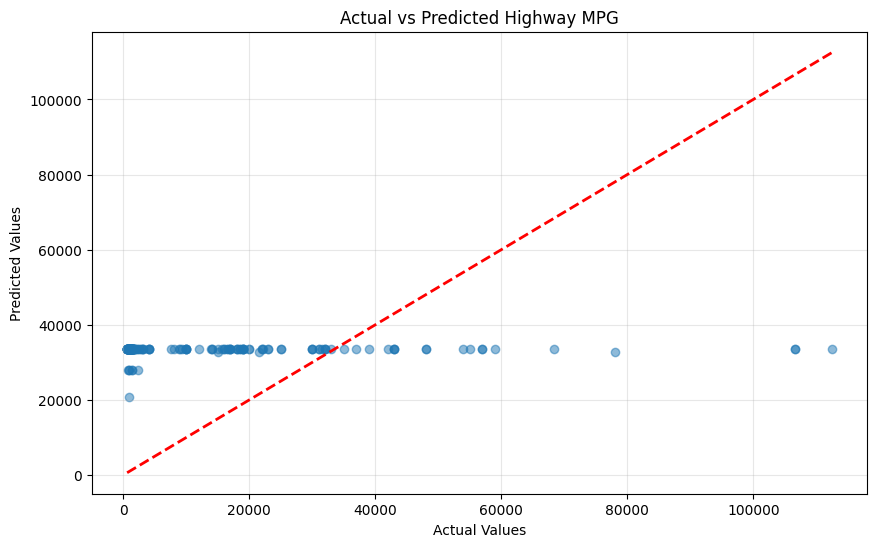

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Highway MPG')
plt.grid(True, alpha=0.3)
plt.show()